<h1>Coronavirus Analysis</h1>
Anthony Preza<br>
Last Updated: 3/14/20
<h4>Summary</h4>
<p>This notebook is meant for adhoc analysis of the spread of coronavirus (COVID-19, novel coronavirus). We begin by downloading the latest time series data from the <a href="https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases">Humanitarian Data Exchange</a>. Confirmed cases and deaths are analyzed worldwide and by country. </p>
<p>TO-DO: Analyze recovery.</p>

To reproduce this notebook, you must have numpy, pandas, matplotlib, scikit-learn, and scipy installed.
```bash
python3 -m venv .venv
source .venv/bin/activate
pip install numpy pandas matplotlib scikit-learn notebook
```
Use Kernel -> Restart Kernel And Run All Cells to run this notebook and create visualizations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Download and view data.

In [3]:
!cd data && wget -O time_series_19-covid-Confirmed.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv && wget -O time_series_19-covid-Deaths.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv && wget -O time_series_19-covid-Recovered.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Recovered.csv

--2020-03-25 00:45:41--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv
Resolving data.humdata.org (data.humdata.org)... 162.249.108.156
Connecting to data.humdata.org (data.humdata.org)|162.249.108.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi     [  <=>               ]  84.94K   277KB/s    in 0.3s    

2020-03-25 00:45:42 (277 KB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [86982]

--2020-03-25 00:45:42--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv
Resolving data.humdata.org (data.humdata.org)... 162.249.108.156
C

In [4]:
!ls data

COVID-19			    time_series_19-covid-Deaths.csv
time_series_19-covid-Confirmed.csv  time_series_19-covid-Recovered.csv


In [5]:
import os

# create list of datasets
datasets = []
for f in os.listdir('data'):
    if '.csv' in f:
        print(f)
        dataset = pd.read_csv(f'data/{f}')
        datasets.append(dataset)

time_series_19-covid-Recovered.csv
time_series_19-covid-Confirmed.csv
time_series_19-covid-Deaths.csv


<h1>Confirmed cases</h1>

In [6]:
# describe the data
confirmed = datasets[1]
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,309.000000
mean,30.285772,-33.097762,1.107784,1.303393,1.878244,2.862275,4.227545,5.842315,11.133733,12.307385,...,311.564870,334.223553,362.329341,393.497006,428.962076,484.447106,543.245509,607.832335,670.568862,1087.391586
std,19.870544,80.661210,19.886889,19.969170,24.875593,34.637942,48.422475,65.253024,159.914427,160.961540,...,3263.324717,3332.995975,3415.516311,3511.636870,3642.374951,3832.930820,4064.084657,4337.179809,4594.278660,5814.685942
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,76.000000
75%,42.165700,21.824300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,28.000000,37.000000,50.000000,58.000000,76.000000,89.000000,117.000000,135.000000,326.000000
max,72.000000,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [7]:
# view first 5 points
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


Calculating total confirmed cases worldwide and building visualizations.

In [8]:
total_confirmed = confirmed.drop(columns=['Lat', 'Long', 'Country/Region']).sum()
print(f'Total confirmed cases worldwide: {total_confirmed[-1]}')

Total confirmed cases worldwide: 336004.0


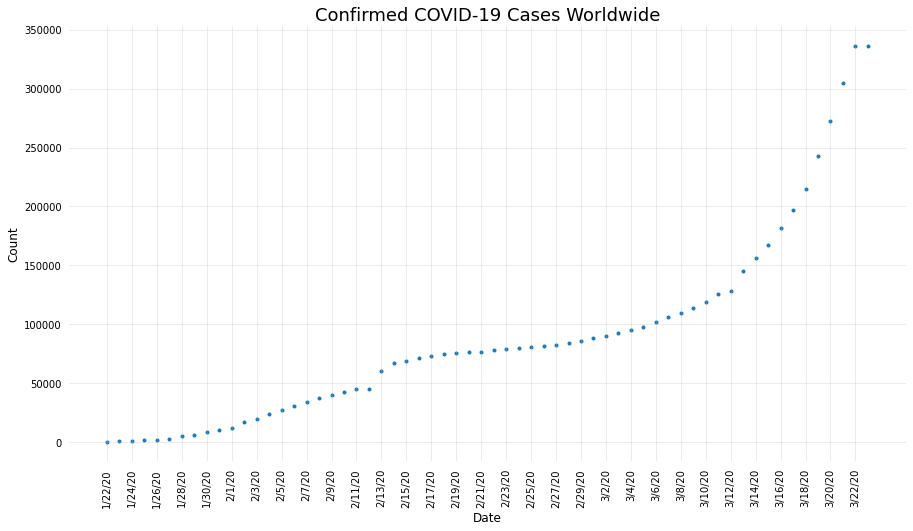

In [18]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_confirmed.index, total_confirmed.values, label='Confirmed cases worldwide', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(10000, 200001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)

# for y in range(10000, 200001, 10000):    
#     plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Confirmed COVID-19 Cases Worldwide', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

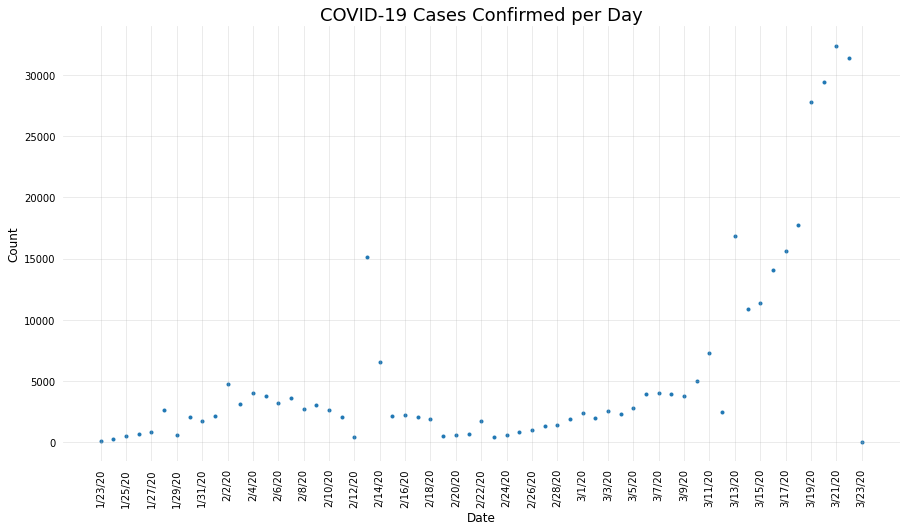

In [25]:
confirmed_per_day = np.diff(total_confirmed)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_confirmed.index[1:], confirmed_per_day, label='Cases confirmed per day', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(1000, 20001, 1000))
plt.xticks(total_confirmed.index[1::2],rotation=90,fontsize=10)

# for y in range(1000, 20001, 1000):    
#     plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('COVID-19 Cases Confirmed per Day', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

Calculate confirmed cases grouped by country and visualize.

In [15]:
confirmed_by_country = confirmed.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by=confirmed.columns[-1], ascending=False)

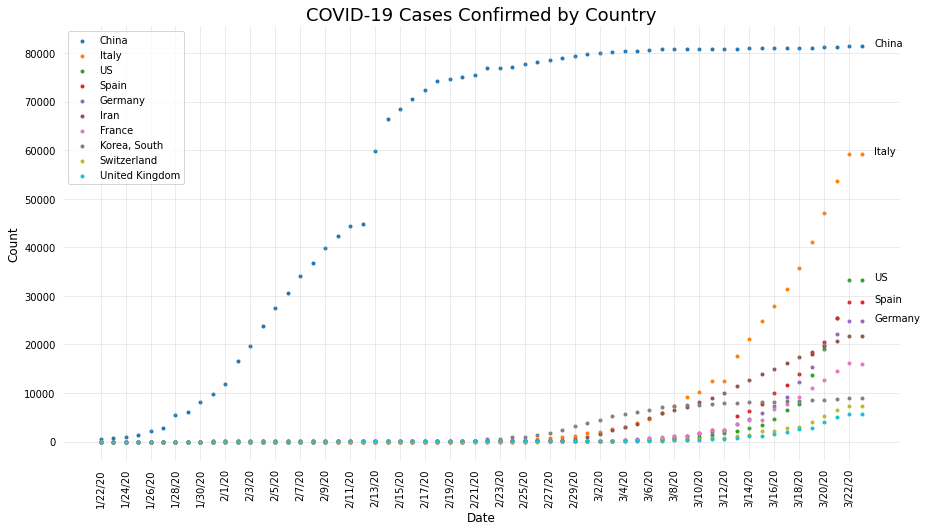

In [16]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
for country in confirmed_by_country.index[:10]:
    plt.scatter(confirmed_by_country.columns, confirmed_by_country.loc[country], label=country, marker='.')
    if country in confirmed_by_country.index[:5]:
        plt.annotate(country, (len(confirmed_by_country.columns), confirmed_by_country.loc[country, confirmed_by_country.columns[-1]]))

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(10000, 100001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)

# for y in range(10000, 100001, 10000):    
#     plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.legend(loc='upper left')
plt.title('COVID-19 Cases Confirmed by Country', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

Visualize localization of cases worldwide.

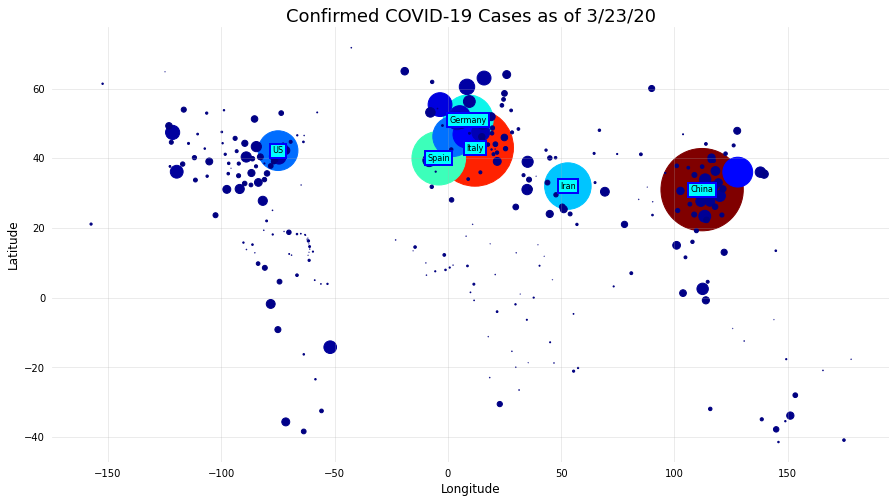

In [17]:
lat_long = confirmed.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by=confirmed.columns[-1], ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long[confirmed.columns[-1]]/10, c=lat_long[confirmed.columns[-1]]/100, cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
# plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)

# for y in range(-100, 101, 10):    
#     plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title(f'Confirmed COVID-19 Cases as of {confirmed.columns[-1]}', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

<h1>Deaths</h1>

In [19]:
deaths = datasets[2]

# describe the data
deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,309.000000
mean,30.285772,-33.097762,0.033932,0.035928,0.051896,0.083832,0.111776,0.163673,0.261477,0.265469,...,11.614770,12.854291,14.223553,15.778443,17.431138,19.694611,22.552894,25.894212,29.205589,47.388350
std,19.870544,80.661210,0.759504,0.760728,1.073919,1.788004,2.324539,3.396639,5.585114,5.585641,...,154.230364,163.299653,173.438560,185.038182,200.925881,217.445884,241.814027,274.033310,303.511759,385.827654
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,42.165700,21.824300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,72.000000,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,3075.000000,3085.000000,3099.000000,3111.000000,3122.000000,3405.000000,4032.000000,4825.000000,5476.000000,5476.000000


In [20]:
# visualize first 5 data points
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


Calculating total deaths worldwide and visualizing.

In [21]:
total_deaths = deaths.drop(columns=['Lat', 'Long', 'Country/Region']).sum()
print(f'Total deaths worldwide: {total_deaths[-1]}')

Total deaths worldwide: 14643.0


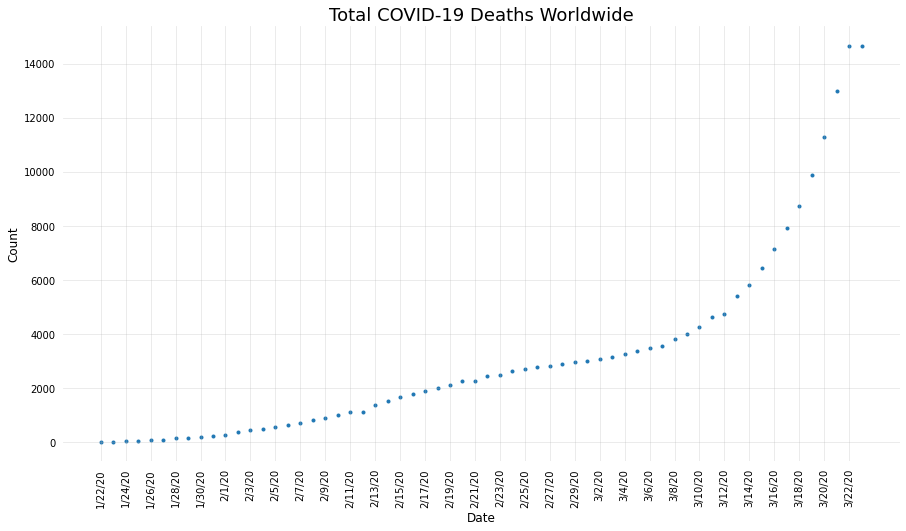

In [22]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_deaths.index, total_deaths.values, label='Confirmed deaths worldwide', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(500, 10001, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)

# for y in range(500, 10001, 500):    
#     plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('Total COVID-19 Deaths Worldwide', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

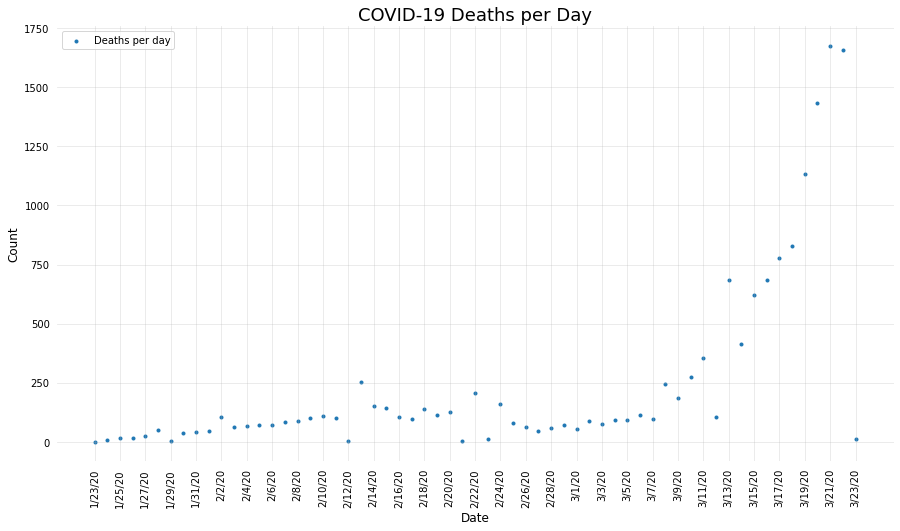

In [24]:
deaths_per_day = np.diff(total_deaths)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_deaths.index[1:], deaths_per_day, label='Deaths per day', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(50, 1001, 50))
plt.xticks(total_deaths.index[1::2],rotation=90,fontsize=10)

# for y in range(50, 1001, 50):    
#     plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('COVID-19 Deaths per Day', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
deaths_by_country = deaths.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by='3/10/20', ascending=False)

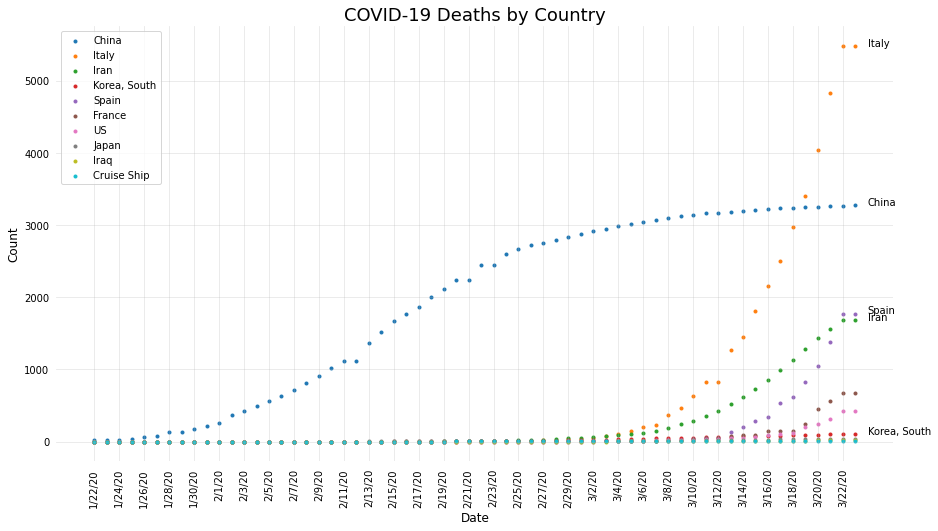

In [28]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
for country in deaths_by_country.index[:10]:
    plt.scatter(deaths_by_country.columns, deaths_by_country.loc[country], label=country, marker='.')
    if country in deaths_by_country.index[:5]:
        plt.annotate(country, (len(deaths_by_country.columns), deaths_by_country.loc[country, deaths_by_country.columns[-1]]))
plt.legend(loc='upper left')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
# plt.yticks(range(500, 5001, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)

# for y in range(500, 5001, 500):    
#     plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('COVID-19 Deaths by Country', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

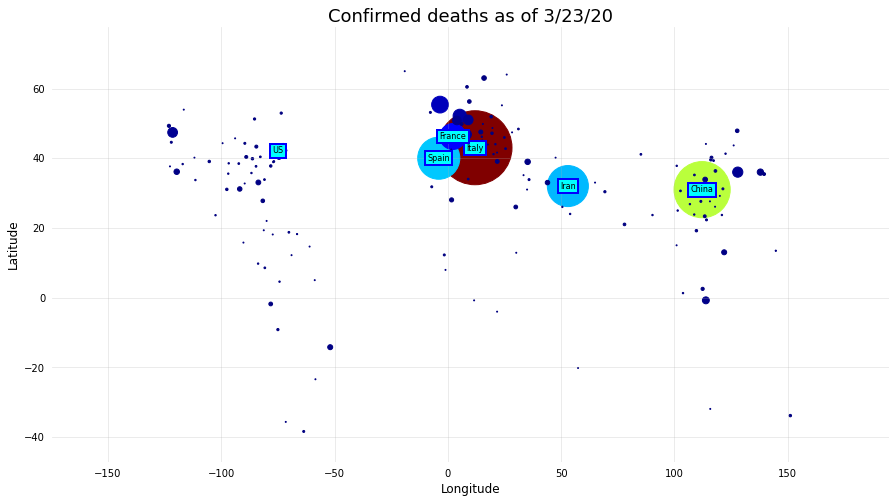

In [29]:
lat_long = deaths.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by=deaths_by_country.columns[-1], ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long[deaths_by_country.columns[-1]], c=lat_long[deaths_by_country.columns[-1]], cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
# plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)

# for y in range(-100, 101, 10):    
#     plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title(f'Confirmed deaths as of {deaths_by_country.columns[-1]}', fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

Visualizing US cases and fitting data to exponential growth. Assuming exponential growth function 
<h4>x = x<sub>0</sub>e<sup>kt</sup></h4>

In [30]:
us_cases = confirmed_by_country.loc['US']
us_cases = us_cases.to_numpy().reshape(-1, 1)
us_cases = np.log(us_cases[us_cases >= 100])

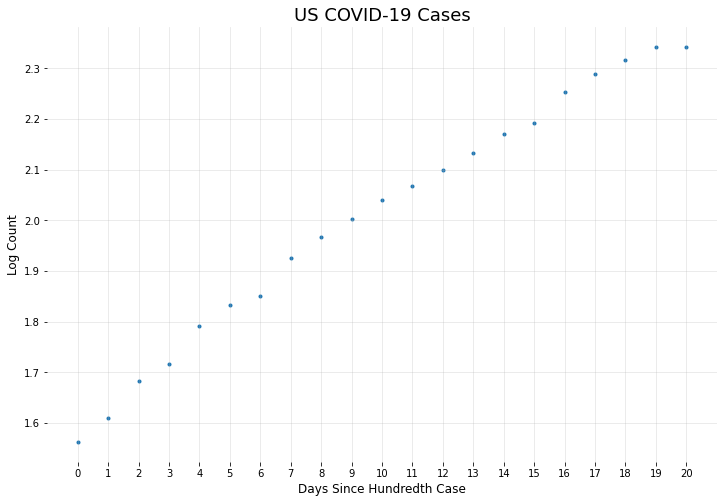

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

#     plt.plot([-1,len(us_cases)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.scatter(range(len(us_cases)), np.log(us_cases), marker='.')

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xticks(range(len(us_cases)), fontsize=10)
plt.xlabel('Days Since Hundredth Case', fontsize=12)
plt.ylabel('Log Count', fontsize=12)
# plt.yticks(range(500, 5001, 500))
plt.grid(True, alpha=0.3)
plt.title('US COVID-19 Cases', fontsize=18)
plt.show()

In [34]:
X0 = us_cases[0]
t = np.array(range(len(us_cases)))
Xt = np.array(us_cases)
t_train, t_test, Xt_train, Xt_test = train_test_split(t, Xt)

In [35]:
# from scipy.optimize import curve_fit


# def fit(t, k):
#     return np.exp(k*t)

# fit_params, fit_cov = curve_fit(fit, t_train.ravel(), Xt_train.ravel())
# k = fit_params[0]
# k

In [91]:
# Xt_pred = fit(t_train.ravel(), k)
# np.sqrt(mean_squared_error(Xt_train, Xt_pred))

In [92]:
# plt.figure(figsize=(10,5))
# plt.scatter(t_train, Xt_train, label='Train data', marker='+')
# plt.scatter(t_train, Xt_pred, label='Train predictions', marker ='o')
# plt.legend()
# plt.title('Exponential Growth Curve', fontsize=16)
# plt.show()

In [93]:
# pred = fit(t_test.ravel(), k)
# plt.figure(figsize=(10,5))
# plt.scatter(t_test, Xt_test, label='Test data', marker='+')
# plt.scatter(t_test, pred, label='Test predictions', marker ='o')
# plt.title('Test Predictions', fontsize=16)
# plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(t_train.reshape(-1, 1), Xt_train)
pred = lin_reg.predict(t.reshape(-1, 1))

In [37]:
lin_reg.score(t_test.reshape(-1, 1), Xt_test)

0.993742362583131

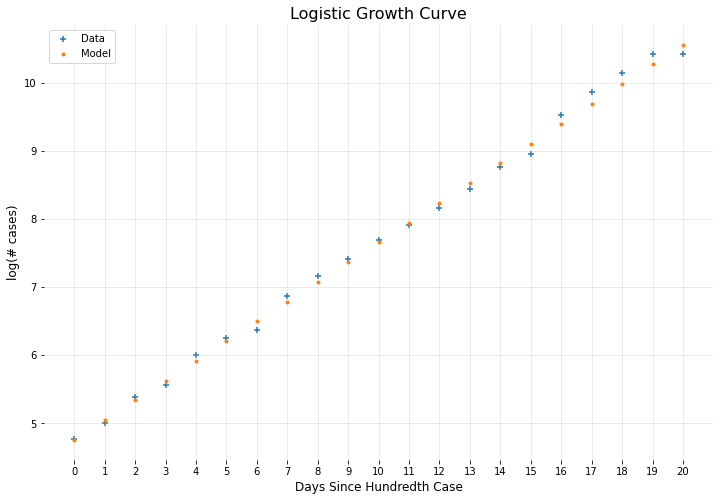

In [43]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(t, Xt, label='Data', marker='+')
plt.scatter(t, pred, label='Model', marker ='.')

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xlabel('Days Since Hundredth Case', fontsize=12)
plt.ylabel('log(# cases)', fontsize=12)
plt.xticks(range(len(us_cases)), fontsize=10)

plt.legend()
plt.title('Logistic Growth Curve', fontsize=16)
plt.grid(True, alpha=0.3)

plt.show()